# Assignment 2 - Question 1
The objective of this assignment is to get you familiarize with  the  problem  of  `Clustering`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q1.ipynb`.

In [ ]:
import nltk
nltk.download('punkt')    
# if u r facing issues while importing nltk, please uncomment above line and run
import re
import numpy as np
import sklearn
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer

     |████████████████████████████████| 79 kB 6.5 MB/s 
     |████████████████████████████████| 3.5 MB 33.3 MB/s 
     |████████████████████████████████| 1.2 MB 54.1 MB/s 
     |████████████████████████████████| 67 kB 6.8 MB/s 
     |████████████████████████████████| 6.8 MB 51.7 MB/s 
     |████████████████████████████████| 895 kB 61.5 MB/s 
     |████████████████████████████████| 596 kB 53.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=5c0b5b448351a7f61c50a2fa8f4a895f7e50207483e5486282c6ce7a1eb34dd6
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# Dataset



*   Try to explore the dataset and first understand
*   Steps while processing the dataset:

1.   Load the dataset
>> The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: train and test. Here, we only use train part of the dataset as we don't need any training.

2.   pre-processing of the dataset
>>   A set of basic pre-processing steps are given below, if you can do it better, it is appreciable
3.   Trying to obtain the embeddings for the text. 
>> Here, we used bert model to obtain the embeddings, if you want to use anyother sentence/word embeddings (ELMo,universal sentence encoder, or other bert models) you can use it, but not mandatorily change it)

PS: You need not completely understand how bert works. If you are interested, few links will be mentioned below.

In [ ]:
# loading of dataset

from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

In [ ]:
print(list(newsgroups_train))
#['data', 'filenames', 'target_names', 'target', 'DESCR']
# all we require for our task is data and target. 
#target_names describe the different groups present (which are 20) all over the dataset

print(list(newsgroups_train.target_names))

['data', 'filenames', 'target_names', 'target', 'DESCR']
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [ ]:
print((newsgroups_train.target[2]))

4


In [ ]:
print((newsgroups_train.data[2]))

From: twillis@ec.ecn.purdue.edu (Thomas E Willis)
Subject: PB questions...
Organization: Purdue University Engineering Computer Network
Distribution: usa
Lines: 36

well folks, my mac plus finally gave up the ghost this weekend after
starting life as a 512k way back in 1985.  sooo, i'm in the market for a
new machine a bit sooner than i intended to be...

i'm looking into picking up a powerbook 160 or maybe 180 and have a bunch
of questions that (hopefully) somebody can answer:

* does anybody know any dirt on when the next round of powerbook
introductions are expected?  i'd heard the 185c was supposed to make an
appearence "this summer" but haven't heard anymore on it - and since i
don't have access to macleak, i was wondering if anybody out there had
more info...

* has anybody heard rumors about price drops to the powerbook line like the
ones the duo's just went through recently?

* what's the impression of the display on the 180?  i could probably swing
a 180 if i got the 80Mb disk

In [ ]:
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
#preprocessing of sentences and the article

def remove_punct(text):
  text = re.sub('[^a-zA-Z0-9 ]+','', text)
  return text

def remove_urls(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)

def remove_tag(text):   
  text=' '.join(text)
  html_pattern = re.compile('<.*?>')
  return html_pattern.sub(r'', text)

def pre_process_sentence(sentence):
  sentence = sentence.lower()
  sentence = remove_tag(sentence)
  sentence = remove_urls(sentence)
  sentence = remove_punct(remove_urls(sentence))
  return sentence

def pre_process_article(article):
  article = str(article).replace("\n", '')
  article = sent_tokenize(article)
  sentences = []
  for each in article:
    if len(each.split(":")) > 1:
      continue
    sentences.append(pre_process_sentence(each))
  return sentences

In [ ]:
def get_review_embedding(article):
  sentences = pre_process_article(article)

  #here review(input) has to be a list of sentences
  #use suitable embeddings to get an embedding for the whole review
  #usage of sentence embeddings is recommended

  sentence_embeddings = bert_model.encode(sentences)

  # take average of all sentence embeddings to obtain a review embedding 
  review_embedding = np.zeros(768)
  count = 0
  for each in sentence_embeddings:
    review_embedding = np.add(np.array(each), review_embedding)
    count += 1
  
  if count != 0: review_embedding /= count

  return review_embedding

In [ ]:
from tqdm import tqdm
embeddings = []
for t in tqdm(newsgroups_train.data):
   embeddings.append(get_review_embedding(t))

100%|██████████| 11314/11314 [12:55<00:00, 14.59it/s]


In [ ]:
len(embeddings[0])

768

In [ ]:
X, y = embeddings, newsgroups_train.target

In [ ]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(np.array(X))
X = X_scaled

In [ ]:
import matplotlib.cm as cm
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_2d = pca.fit_transform(X_scaled)

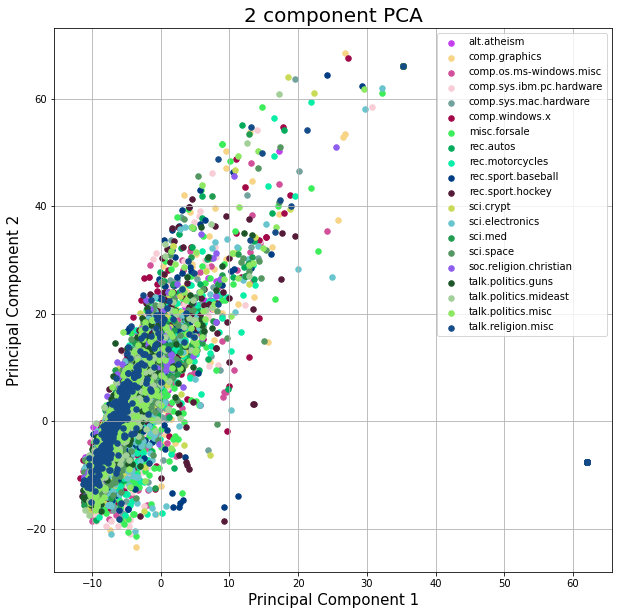

In [ ]:
import random
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
target_names = newsgroups_train["target_names"]
targets = list(range(len(target_names)))
colors = [(random.random(),random.random(),random.random()) for ele in newsgroups_train["target_names"]]
for target, color in zip(targets,colors):
    indicesToKeep = (np.array(y) == target)
    ax.scatter(X_2d[indicesToKeep , 0]
               , X_2d[indicesToKeep , 1]
               , color = color
               , s = 30)
ax.legend(target_names)
ax.grid()


# K_Means Algorithm


In [ ]:
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 

from sklearn.cluster import KMeans

num_clusters = 20
kmeans = KMeans(n_clusters=20, random_state=4).fit(X_scaled)
cluster_assignment = kmeans.labels_

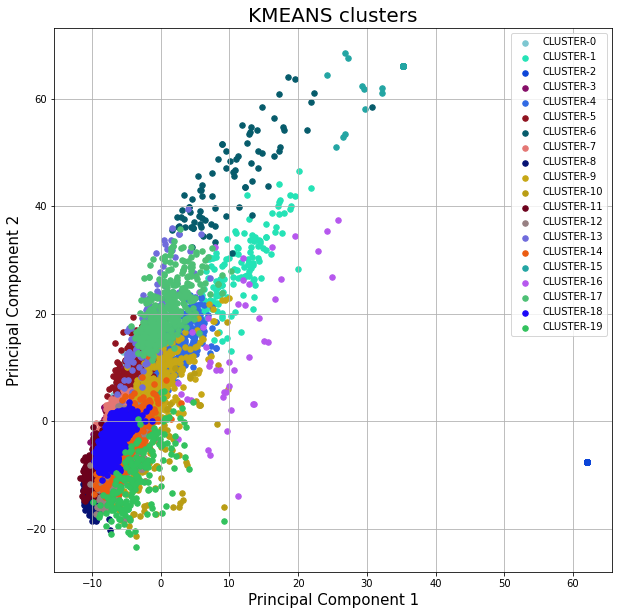

In [ ]:
#code for visualisation of clusters
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('KMEANS clusters', fontsize = 20)
targets = list(np.unique(cluster_assignment))
target_names = ["CLUSTER-" + str(ele) for ele in targets]
colors = [(random.random(),random.random(),random.random()) for ele in newsgroups_train["target_names"]]
for target, color in zip(targets,colors):
    indicesToKeep = (kmeans.labels_ == target)
    ax.scatter(X_2d[indicesToKeep , 0]
               , X_2d[indicesToKeep , 1]
               , color = color
               , s = 30)
ax.legend(target_names)
ax.grid()

# Elbow method



*   Try to understand how elbow method works
*   Plot the graph between average distance and the number of clusters
*   Use elbow method to find the optimal number of clusters, 







In [ ]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [ ]:
def elbow_method():
    distortions = []
    K = range(1, 10)
    
    for k in tqdm(K):
        # Building and fitting the model
        kmeanModel = KMeans(n_clusters=k).fit(X)
    
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                            'euclidean'), axis=1)) / len(X))

    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method using Distortion')
    plt.show()


100%|██████████| 9/9 [00:50<00:00,  5.60s/it]


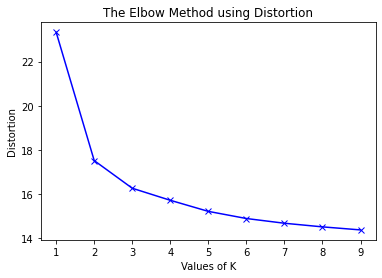

In [ ]:
elbow_method()

In [ ]:
def elbow_method(): 
    range_n_clusters = range(1,10)
    avg_distance=[]
    for n_clusters in tqdm(range_n_clusters):
        clusterer = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
        avg_distance.append(clusterer.inertia_)

    plt.plot(range_n_clusters, avg_distance)
    plt.title("Elbow method using Inertia")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Distance")
    plt.show()

100%|██████████| 9/9 [00:43<00:00,  4.80s/it]


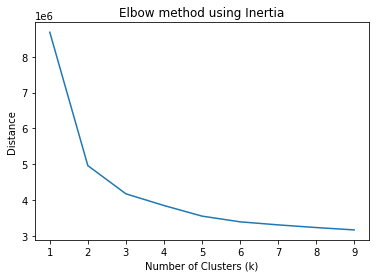

In [ ]:
elbow_method()

# Silhouette Method


*   Compute silhouette score varying the K number of clusters

*   Plot the graph between silhoutte score and number of clusters 

*   Find the optimal number of clusters using silhouette method




> Report the optimal number of clusters you obtained from above two methods (elbow and silhouette)




100%|██████████| 19/19 [04:30<00:00, 14.24s/it]


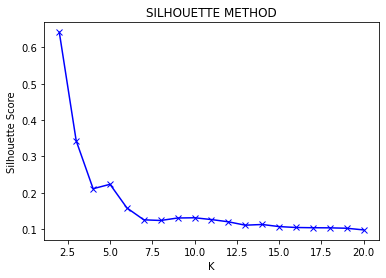

In [30]:
from sklearn.metrics import silhouette_score as SIL_SCORE
def silhouette_score():
  sil_scores = []
  ks = []
  for k in tqdm(range(2,21)):
    # print(k)
    ks.append(k)
    kmeans_model = KMeans(n_clusters=k, random_state=4).fit(X_scaled)
    score = SIL_SCORE(X_scaled , kmeans_model.labels_)
    sil_scores.append(score)
    # print(sil_scores)
  
  plt.plot(ks , sil_scores , 'bx-')
  plt.xlabel('K')
  plt.ylabel('Silhouette Score')
  plt.title('SILHOUETTE METHOD')
  plt.show()

  
silhouette_score()

Optimum number of clusters is at the highest silhouette score which is around 3.

# Agglomerative clustering

In [ ]:
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 

from sklearn.cluster import AgglomerativeClustering as AggClust

def AgglomerativeClustering(n_clusters):
  clustering = AggClust(n_clusters=n_clusters , compute_distances=True).fit(X)
  return  clustering , clustering.labels_

agglo_cluster_model,agglo_cluster_labels = AgglomerativeClustering((20))


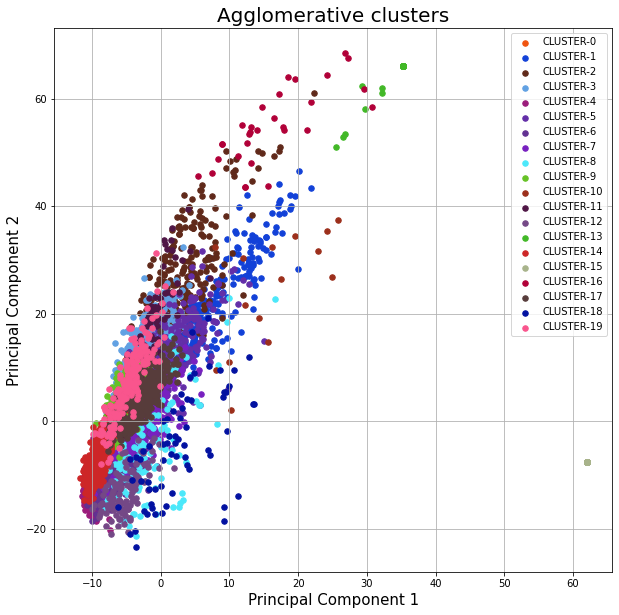

In [ ]:
#code for visualisation of clusters
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Agglomerative clusters', fontsize = 20)
targets = list(np.unique(agglo_cluster_model.labels_))
target_names = ["CLUSTER-" + str(ele) for ele in targets]
colors = [(random.random(),random.random(),random.random()) for ele in newsgroups_train["target_names"]]
for target, color in zip(targets,colors):
    indicesToKeep = (agglo_cluster_model.labels_ == target)
    ax.scatter(X_2d[indicesToKeep , 0]
               , X_2d[indicesToKeep , 1]
               , color = color
               , s = 30)
ax.legend(target_names)
ax.grid()



# Dendogram


*   Try to understand the difference between agglomerative clustering and hierarchical clustering
*   Plot dendograms for both kinds of clustering
*   Find the optimal number of clusters with the help of Dendogram



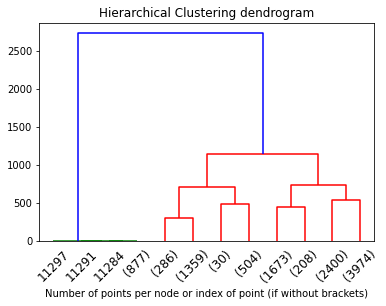

In [ ]:
# code to write dendogram

# code to write dendogram
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plot_dendrogram(agglo_cluster_model , truncate_mode='level' , p=3)
plt.xlabel("Number of points per node or index of point (if without brackets)")
plt.title("Hierarchical Clustering dendrogram")
plt.xticks(rotation=45)
plt.show()


## Difference between agglomerative and divisive
In Agglomerative hierarchical method, each object creates its own clusters. The single Clusters are merged to make larger clusters and the process of merging continues until all the singular clusters are merged into one big cluster that consists of all the objects.

Divisive Hierarchical clustering method works on the top-down approach. In this method all the objects are arranged within a big singular cluster and the large cluster is continuously divided into smaller clusters until each cluster has a single object.

# useful links to understand BERT

*  https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270#:~:text=How%20BERT%20works,%2Dwords)%20in%20a%20text.&text=As%20opposed%20to%20directional%20models,sequence%20of%20words%20at%20once.


